<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_2_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.145607,21.710007,48.628358,0.076440,111.560412,111.514169,0.046243
1,0.0,1.0,82.493748,83.038709,97.385286,0.008487,272.926230,272.918458,0.007772
2,0.0,2.0,78.340575,66.273323,30.402214,-0.005119,185.010992,185.012478,-0.001486
3,0.0,3.0,31.878142,47.995273,46.362059,0.005454,136.240928,136.255453,-0.014525
4,0.0,4.0,90.612481,63.255670,55.725324,-0.007310,219.586166,219.591645,-0.005479
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,70.039931,81.402669,20.868203,0.000697,182.311501,182.311206,0.000294
19996,999.0,16.0,72.532113,36.780048,29.315179,0.007140,148.634480,148.624242,0.010238
19997,999.0,17.0,29.306998,98.928516,33.415544,-0.003019,171.648040,171.651203,-0.003163
19998,999.0,18.0,43.101232,59.309375,79.611507,-0.005972,192.016142,192.014126,0.002017


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    31.145607  21.710007  48.628358  ...  111.560412  111.514169  0.046243
      1.0    82.493748  83.038709  97.385286  ...  272.926230  272.918458  0.007772
      2.0    78.340575  66.273323  30.402214  ...  185.010992  185.012478 -0.001486
      3.0    31.878142  47.995273  46.362059  ...  136.240928  136.255453 -0.014525
      4.0    90.612481  63.255670  55.725324  ...  219.586166  219.591645 -0.005479
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   70.039931  81.402669  20.868203  ...  182.311501  182.311206  0.000294
      16.0   72.532113  36.780048  29.315179  ...  148.634480  148.624242  0.010238
      17.0   29.306998  98.928516  33.415544  ...  171.648040  171.651203 -0.003163
      18.0   43.101232  59.309375  79.611507  ...  192.016142  192.014126  0.002017
      19.0   44.728299  24.306236  35.695462  ...  114.758212  114.725685  0.032527

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    31.145607  21.710007  48.628358  ...  111.560412  111.514169  0.046243
      1.0    82.493748  83.038709  97.385286  ...  272.926230  272.918458  0.007772
      2.0    78.340575  66.273323  30.402214  ...  185.010992  185.012478 -0.001486
      3.0    31.878142  47.995273  46.362059  ...  136.240928  136.255453 -0.014525
      4.0    90.612481  63.255670  55.725324  ...  219.586166  219.591645 -0.005479
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   70.039931  81.402669  20.868203  ...  182.311501  182.311206  0.000294
      16.0   72.532113  36.780048  29.315179  ...  148.634480  148.624242  0.010238
      17.0   29.306998  98.928516  33.415544  ...  171.648040  171.651203 -0.003163
      18.0   43.101232  59.309375  79.611507  ...  192.016142  192.014126  0.002017
      19.0   44.728299  24.306236  35.695462  ...  114.758212  114.725685  0.032527

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.145607,21.710007,48.628358,0.076440,111.560412,111.514169,0.046243
1,0.0,1.0,82.493748,83.038709,97.385286,0.008487,272.926230,272.918458,0.007772
2,0.0,2.0,78.340575,66.273323,30.402214,-0.005119,185.010992,185.012478,-0.001486
3,0.0,3.0,31.878142,47.995273,46.362059,0.005454,136.240928,136.255453,-0.014525
4,0.0,4.0,90.612481,63.255670,55.725324,-0.007310,219.586166,219.591645,-0.005479
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,70.039931,81.402669,20.868203,0.000697,182.311501,182.311206,0.000294
19996,999.0,16.0,72.532113,36.780048,29.315179,0.007140,148.634480,148.624242,0.010238
19997,999.0,17.0,29.306998,98.928516,33.415544,-0.003019,171.648040,171.651203,-0.003163
19998,999.0,18.0,43.101232,59.309375,79.611507,-0.005972,192.016142,192.014126,0.002017


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    31.145607  21.710007  48.628358  ...  111.560412  111.514169  0.046243
      1.0    82.493748  83.038709  97.385286  ...  272.926230  272.918458  0.007772
      2.0    78.340575  66.273323  30.402214  ...  185.010992  185.012478 -0.001486
      3.0    31.878142  47.995273  46.362059  ...  136.240928  136.255453 -0.014525
      4.0    90.612481  63.255670  55.725324  ...  219.586166  219.591645 -0.005479
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   70.039931  81.402669  20.868203  ...  182.311501  182.311206  0.000294
      16.0   72.532113  36.780048  29.315179  ...  148.634480  148.624242  0.010238
      17.0   29.306998  98.928516  33.415544  ...  171.648040  171.651203 -0.003163
      18.0   43.101232  59.309375  79.611507  ...  192.016142  192.014126  0.002017
      19.0   44.728299  24.306236  35.695462  ...  114.758212  114.725685  0.032527

[20000 rows x 7 columns]

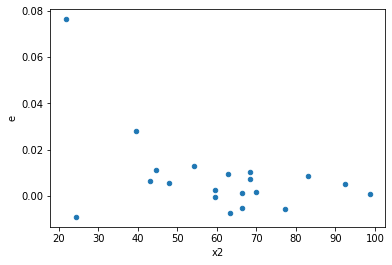

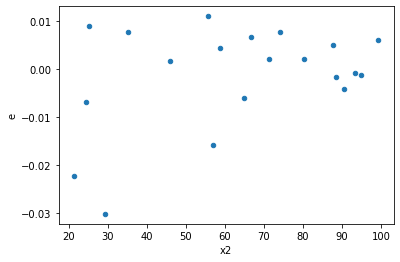

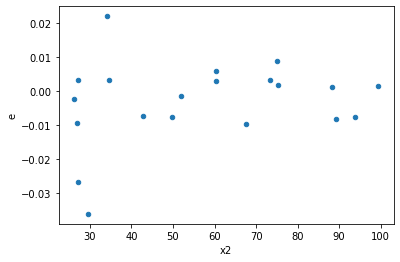

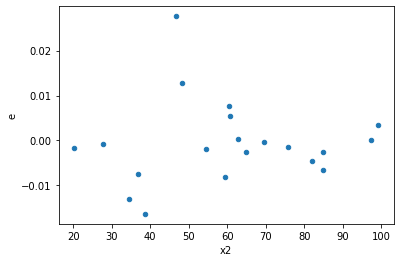

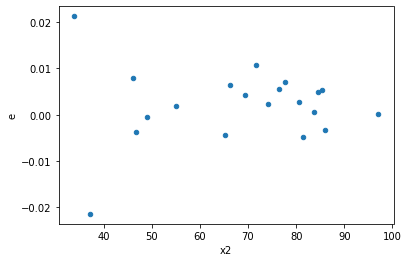

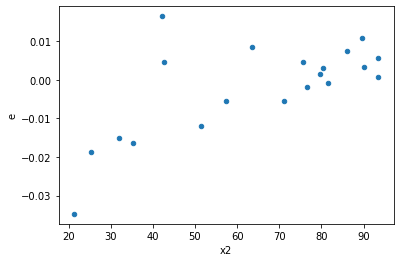

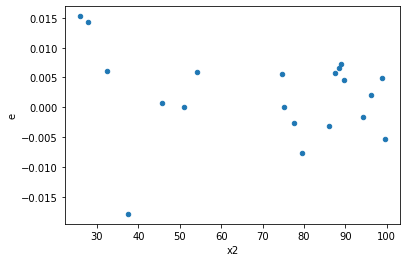

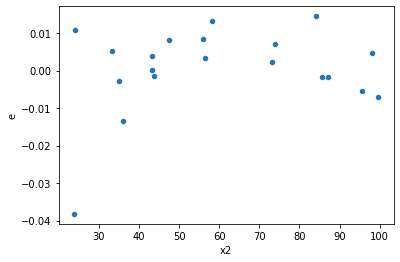

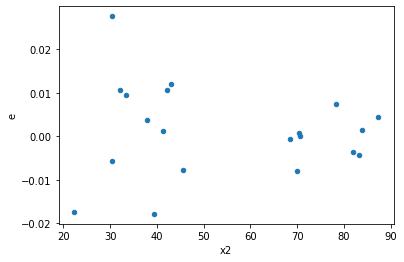

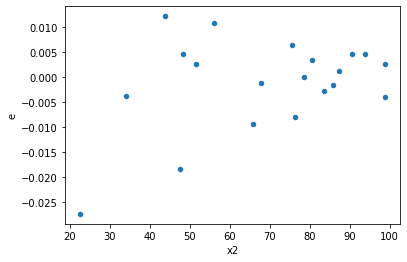

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,11.0,3.0,0.0006023807707317633,0.0008675318718037587,5.4761888248342114e-05,0.0002891772906012529,5.280630377277168,0.1971420579779699,0.901428971011015,0.09857102898898495,Reject001=1 : Homoscedasticity
2.0,5.0,9.0,0.00016903194901443023,0.002298216313704956,3.380638980288605e-05,0.00025535736818943955,7.553523747384576,0.009633689555287095,0.9951831552223565,0.0048168447776435475,Reject001=0 : Heteroscedasticity
3.0,5.0,9.0,0.000195079582911818,0.0013933036686544478,3.90159165823636e-05,0.00015481151873938308,3.967906749353741,0.07056759987745331,0.9647162000612733,0.03528379993872666,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,0.00016759747203015982,0.0002756786670564907,2.3942496004308547e-05,3.938266672235581e-05,1.6448855923487986,0.5272409455702489,0.7363795272148755,0.26362047278512446,Reject001=1 : Homoscedasticity
6.0,10.0,4.0,0.0002942809715554867,0.0003661860870413279,2.942809715554867e-05,9.154652176033197e-05,3.1108542722433845,0.2853699195490509,0.8573150402254746,0.14268495977452544,Reject001=1 : Homoscedasticity
9.0,8.0,6.0,0.00019283879047884923,0.0002394352735885616,2.4104848809856154e-05,3.990587893142693e-05,1.6555125172620848,0.5556214620637361,0.722189268968132,0.27781073103186804,Reject001=1 : Homoscedasticity
10.0,6.0,8.0,0.00015166199344364143,0.0008033072953719979,2.527699890727357e-05,0.00010041341192149973,3.9725211165240553,0.07656912671878824,0.9617154366406059,0.03828456335939412,Reject001=1 : Homoscedasticity
12.0,8.0,6.0,0.00024189648201860072,0.0010872812023368426,3.023706025232509e-05,0.0001812135337228071,5.993093647682652,0.042452463983257305,0.9787737680083713,0.021226231991628652,Reject001=1 : Homoscedasticity
13.0,10.0,4.0,0.0004073119425947897,0.0009813234843210068,4.073119425947897e-05,0.0002453308710802517,6.023169110077302,0.09833216015714252,0.9508339199214287,0.04916608007857126,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,0.0012957037172200876,0.00022180763509573642,0.0001851005310314411,3.168680501367663e-05,0.17118700220419317,0.03294335201130367,Reject001=1 : Homoscedasticity
1.0,11.0,3.0,0.0006023807707317633,0.0008675318718037587,5.4761888248342114e-05,0.0002891772906012529,5.280630377277168,0.1971420579779699,Reject001=1 : Homoscedasticity
2.0,5.0,9.0,0.00016903194901443023,0.002298216313704956,3.380638980288605e-05,0.00025535736818943955,7.553523747384576,0.009633689555287095,Reject001=0 : Heteroscedasticity
3.0,5.0,9.0,0.000195079582911818,0.0013933036686544478,3.90159165823636e-05,0.00015481151873938308,3.967906749353741,0.07056759987745331,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,0.00016759747203015982,0.0002756786670564907,2.3942496004308547e-05,3.938266672235581e-05,1.6448855923487986,0.5272409455702489,Reject001=1 : Homoscedasticity
5.0,8.0,6.0,0.000650815615648705,5.2943471910944564e-05,8.135195195608812e-05,8.823911985157428e-06,0.10846589138906426,0.0061812143739146015,Reject001=0 : Heteroscedasticity
6.0,10.0,4.0,0.0002942809715554867,0.0003661860870413279,2.942809715554867e-05,9.154652176033197e-05,3.1108542722433845,0.2853699195490509,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,0.0010045751087643389,0.0004972404987594002,0.00014351072982347698,7.10343569656286e-05,0.4949759300437204,0.3739418251084187,Reject001=1 : Homoscedasticity
8.0,10.0,4.0,0.0010473954349264564,8.028647862784734e-05,0.00010473954349264564,2.0071619656961835e-05,0.1916336369975794,0.03123526311972537,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      769
Reject001=0 : Heteroscedasticity    231
Name: Result_test, dtype: int64